# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
pd.options.display.float_format = '{:20,.2f}'.format
import numpy as np
import statsmodels.api as sm
import os
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
#import dataframe_image as dfi
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [5]:
df_predict = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# import tweepy

# consumer_key = 'xxx'
# consumer_secret = 'xxx'
# access_token = 'xxx'
# access_secret = 'xxx'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth)

In [7]:
# from tweepy import OAuthHandler
# from timeit import default_timer as timer
# tweet_ids = df_archive.tweet_id.values
# len(tweet_ids)
# Tweet IDs for which to gather additional data via Twitter's API
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [8]:
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

In [9]:
with open("tweet_json.txt", mode='wb') as file:
    file.write(response.content)

In [10]:
# read the json.txt file into a datframe:
df_json = pd.DataFrame(columns=["tweet_id", "retweet_count", "favorite_count"], dtype=int)
true = True
false = False
null = None
with open("tweet_json.txt") as json_file:
    for line in json_file:        
        tweet_data = eval(line)
        df_json = df_json.append({"tweet_id": tweet_data["id"], "retweet_count": tweet_data["retweet_count"], "favorite_count": tweet_data["favorite_count"]}, ignore_index=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [11]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
df_archive.shape

(2356, 17)

In [13]:
df_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [14]:
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [15]:
df_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
df_archive.name.sample(20)

2047    Scruffers
506         Sammy
865         Scout
956          None
1274         None
1056         Doug
1495        Amber
1291       Cooper
1301         None
1285       Bobble
595          None
141          None
884         Sadie
600          None
1008         None
1417       Claude
2242         None
844        Brudge
1880       Mollie
1705        Ellie
Name: name, dtype: object

In [17]:
df_archive.rating_numerator.isna().sum()

0

In [18]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [19]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [20]:
df_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [21]:
df_json.dtypes

tweet_id          int64
retweet_count     int64
favorite_count    int64
dtype: object

In [22]:
df_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51,True,miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.60,True,malinois,0.14,True,bloodhound,0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.41,True,redbone,0.36,True,miniature_pinscher,0.22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.56,True,Rottweiler,0.24,True,Doberman,0.15,True


In [23]:
df_predict.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [24]:
df_predict.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Quality issues
1. In the prediction data frame, some dog breeds are capitalized, while others are not.

2. In the dog 'name' column in the twitter archive, some cells have a value of 'None'.

3. In the dog 'name' column in the twitter archive, there are lowercase words that are obviously not names.

4. For most dogs in the twitter archive, there is no information about the dog stage. The cells contain 'None'.

5. There are retweets in the twitter archive. 

6. In the twitter archive, there are some rare values of the rating numerator (with counts of 1 or 2). Most of them are extreme. 

7. In the twitter archive, some values of 'rating_denominator' are different from 10 (all rare, with counts of 1, 2 or 3).

8. In the data frame from the json file, the tweet_id column is of type 'float64'. This is problematic, because it does not fit the data type in the other two data frames.

### Tidiness issues
1. The prediction data frame contains only one variable: the predicted dog breed.

 1.1. Quality issue #9: After transforming into one column, there are NaN values, because for some dogs, all three predictions were not of a dog.


2. In the twitter archive, the dog stages are one variable and should be one column.


3. The unit of observation in all three tables is the same: the tweet (after trimming extra rows, tables should be merged on the tweet ID column).

    - Although it could be argued that in the prediction dataframe the unit is the dog; but since we are trimming all of the retweets, each tweet ID in any of the tables should correspond to one dog exactly.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
# twitter archive:
df_archive_clean = df_archive.copy()
# predicted dog breeds:
df_predict_clean = df_predict.copy()
# retweet & favorite count:
df_json_clean = df_json.copy()

### Issue #1:

df_predict contains only one variable: the predicted dog breed.

#### Define
If the first prediction is of a dog ('p1_dog' = True), take the value of p1 and paste it into a new column;

If not: check if 'p2_dog' = True, take the value of p2 and paste it into the new column;

If not: check if 'p3_dog' = True, take the value of p3 and paste it into the new column.

#### Code

In [26]:
mask_1 = df_predict_clean['p1_dog']
df_predict_clean.loc[mask_1,'dog_breed'] = df_predict_clean.loc[mask_1,'p1'] 

mask_2 = df_predict_clean['p2_dog'] & ~df_predict_clean['p1_dog']
df_predict_clean.loc[mask_2,'dog_breed'] = df_predict_clean.loc[mask_2,'p2']

mask_3 = df_predict_clean['p3_dog'] & ~df_predict_clean['p1_dog'] & ~df_predict_clean['p2_dog']
df_predict_clean.loc[mask_3,'dog_breed'] = df_predict_clean.loc[mask_2,'p3']

#### Test

In [27]:
df_predict_clean.dog_breed

0       Welsh_springer_spaniel
1                      redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071        Labrador_retriever
2072                 Chihuahua
2073                 Chihuahua
2074                       NaN
Name: dog_breed, Length: 2075, dtype: object

### Issue #2:
There are NaNs in the dog_breed column.

In [28]:
df_predict_clean.dog_breed.isna().sum()

388

#### Define:
Replace NaNs in dog_breed column by 'no_breed'.

#### Code

In [29]:
#df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].fillna('no_stage')
df_predict_clean['dog_breed'] = df_predict_clean['dog_breed'].fillna('no_breed')

#### Test

In [30]:
df_predict_clean.dog_breed.value_counts()

no_breed              388
golden_retriever      166
Labrador_retriever    110
Pembroke               94
Chihuahua              94
                     ... 
Scotch_terrier          1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
clumber                 1
Name: dog_breed, Length: 113, dtype: int64

In [31]:
df_predict_clean.dog_breed.isna().sum()

0

### Issue #3:
Some dog breeds are capitalized, while others are not.

#### Define
Decapitalize all dog breeds.

#### Code

In [32]:
#df['x'].str.lower()
df_predict_clean['dog_breed'] = df_predict_clean['dog_breed'].str.lower()

#### Test

In [33]:
df_predict_clean.dog_breed.value_counts()

no_breed              388
golden_retriever      166
labrador_retriever    110
pembroke               94
chihuahua              94
                     ... 
scotch_terrier          1
entlebucher             1
japanese_spaniel        1
standard_schnauzer      1
clumber                 1
Name: dog_breed, Length: 113, dtype: int64

### Issue 4:
In the twitter archive, some cells in the 'name' column have a value of 'None'

#### Define
Replace 'None' by 'no_name'.

#### Code

In [34]:
#df_predict_clean['dog_breed'] = df_predict_clean['dog_breed'].fillna('no_breed')
df_archive_clean['name'] = df_archive_clean['name'].fillna('no_name')

#### Test

In [35]:
df_archive_clean.name.isna().sum()

0

In [36]:
df_archive_clean.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### Issue #4.1:
After fillna('no_name'), there are still 'None' values.

#### Define
Replace 'None' in df_archive.name by 'no_name' with str.replace

#### Code

In [37]:
df_archive_clean['name'] = df_archive_clean['name'].replace({'None':'no_name'})

#### Test

In [38]:
df_archive_clean['name'].value_counts()

no_name       745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### Issue #5:
Better: In the twitter archive, some cells in the 'name' column contain a lowercase words which are obviously not names. 

#### Define:
Better: replace all lowercase values by NaN (by boolean mask); then replace 'NaN' by 'no_name'.

#### Code

In [39]:
#df_archive_clean['name'] = df_archive_clean['name'].replace({'a':'no_name', 'an':'no_name', 'just':'no_name', 'very':'no_name', 'the':'no_name', 'not':'no_name', 'by':'no_name', 'space':'no_name', 'life':'no_name'})

In [40]:
#https://stackoverflow.com/questions/61867937/boolean-masking-to-replace-all-strings-containing-only-zero-in-pandas-column
#dftest['col2'] = dftest['col2'].mask(dftest['col2'].str.contains('^[0]+$'))
df_archive_clean['name'] = df_archive_clean['name'].mask(df_archive_clean['name'].str.islower())

In [41]:
# replace NaN by 'no_name':
df_archive_clean['name'] = df_archive_clean['name'].fillna('no_name')

#### Test

In [42]:
df_archive_clean.name.value_counts()

no_name       854
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: name, Length: 932, dtype: int64

In [43]:
df_archive_clean.name.sample(20)

734      Oakley
436     no_name
495     Eleanor
800      Gromit
2052    Malcolm
1329        Max
313     no_name
1901    no_name
1645     Jiminy
670       Happy
1107     Livvie
910      Cooper
416     no_name
1433    no_name
1040    no_name
1074      Simba
656      Maddie
154     no_name
1725      Emmie
2092    no_name
Name: name, dtype: object

In [44]:
#df_archive_clean.name.islower.any()

### Issue #6:
In df_archive, the dog stages are one variable and should be one column.
Furthermore, replace 'None' by 'no_stage' (cleaning).

#### Define
Paste the values that are different from 'None' into a new column 'dog_stage'; change 'None'-values to 'no_stage'.

#### Code

In [45]:
mask_doggo = df_archive_clean.doggo == 'doggo'
df_archive_clean.loc[mask_doggo,'dog_stage'] = df_archive_clean.loc[mask_doggo,'doggo']

mask_floofer = df_archive_clean.floofer == 'floofer'
df_archive_clean.loc[mask_floofer,'dog_stage'] = df_archive_clean.loc[mask_floofer,'floofer']

mask_pupper = df_archive_clean.pupper == 'pupper'
df_archive_clean.loc[mask_pupper,'dog_stage'] = df_archive_clean.loc[mask_pupper,'pupper']

mask_puppo = df_archive_clean.puppo == 'puppo'
df_archive_clean.loc[mask_puppo,'dog_stage'] = df_archive_clean.loc[mask_puppo,'puppo']

#replace 'none' by 'no_stage'
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].fillna('no_stage')

#### Test

In [46]:
df_archive_clean.dog_stage.value_counts()

no_stage    1976
pupper       257
doggo         83
puppo         30
floofer       10
Name: dog_stage, dtype: int64

In [47]:
df_archive_clean.dog_stage.isna().sum()

0

### Issue #7:
There are retweets in df_archive. 

#### Define
Remove the retweets: keep only rows of df_archive where 'retweeted_status_id' is NaN.

#### Code

In [48]:
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'].isna()]

#### Test

In [49]:
df_archive_clean.retweeted_status_id.notna().sum()

0

In [50]:
df_archive_clean.shape

(2175, 18)

### Issue #8:
In the twitter archive, there are some rare values of the rating numerator (with counts of 1 or 2). Most of them are extreme (outliers).

#### Define
Keep only rows where the count of rating numerator is higher than 2. (This way, the max. numerator would be 0, the min. would be 14.)

#### Code

In [51]:
num_counts = df_archive_clean.rating_numerator.value_counts()
df_archive_clean = df_archive_clean[~df_archive_clean['rating_numerator'].isin(num_counts[num_counts < 3].index)]

#### Test

In [52]:
df_archive_clean.rating_numerator.value_counts()

12    500
10    442
11    426
13    307
9     156
8      98
7      54
14     43
5      36
6      32
3      19
4      17
2       9
1       8
Name: rating_numerator, dtype: int64

### Issue #9 (last):
In the twitter archive, some values of 'rating_denominator' are different from 10 (all rare, with counts of 1, 2 or 3).

#### Define
Remove all values of 'rating_denominator' that are different from 10 by saving only rows where the value of 'rating_denominator' is 10.

In [53]:
#num_counts = df_archive_clean.rating_numerator.value_counts()
#df_archive_clean = df_archive_clean[~df_archive_clean['rating_numerator'].isin(num_counts[num_counts < 3].index)]
#df[(df['B']=='Blue') & (df['C']=='Green')]

df_archive_clean = df_archive_clean[df_archive_clean['rating_denominator'] == 10]

#### Test

In [54]:
df_archive_clean.rating_denominator.value_counts()

10    2141
Name: rating_denominator, dtype: int64

### Issue #10:
In df_json, the tweet_id column is of type 'float64'.

#### Define
Change type of df_json.tweet_id to 'int64'

#### Code

In [55]:
df_json['tweet_id'] = df_json['tweet_id'].astype(int)

#### Test

In [56]:
df_json.dtypes

tweet_id          int32
retweet_count     int64
favorite_count    int64
dtype: object

In [57]:
df_json.head()

,tweet_id,retweet_count,favorite_count
0,-648585215,8853,39467
1,1100394498,6514,33819
2,-1286119424,4328,25461
3,-1885904896,8964,42908
4,1079468032,9774,41048


### Recheck dfs

In [58]:
df_predict_clean.shape

(2075, 13)

In [59]:
df_archive_clean.retweeted_status_timestamp.notna().sum()

0

In [60]:
df_archive_clean.shape

(2141, 18)

In [61]:
df_json.shape

(2354, 3)

In [62]:
#df.duplicated(subset=['brand'])
df_json.duplicated(subset=['tweet_id'])

0       False
1       False
2       False
3       False
4       False
        ...  
2349    False
2350    False
2351    False
2352    False
2353    False
Length: 2354, dtype: bool

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [63]:
df_predict_clean = df_predict_clean[['tweet_id', 'dog_breed']]

In [64]:
df_predict_clean.head()

,tweet_id,dog_breed
0,666020888022790149,welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,german_shepherd
3,666044226329800704,rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


In [65]:
# save only important variables
df_archive_clean = df_archive_clean[['tweet_id','timestamp','source','text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage']]

In [66]:
df_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,no_stage
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,no_stage
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,no_stage
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,no_stage
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,no_stage


In [67]:
df_archive_clean.tail(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,no_name,no_stage
2355,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,no_name,no_stage


In [68]:
twitter_archive_master = df_archive_clean.merge(df_predict_clean, on='tweet_id', how='left').merge(df_json_clean, on='tweet_id', how='left')

In [69]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,no_stage,no_breed,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,no_stage,chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,no_stage,chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,no_stage,labrador_retriever,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,no_stage,basset,9774,41048


In [70]:
twitter_archive_master.shape

(2141, 12)

In [71]:
twitter_archive_master.isna().sum()

tweet_id                0
timestamp               0
source                  0
text                    0
expanded_urls          49
rating_numerator        0
rating_denominator      0
name                    0
dog_stage               0
dog_breed             172
retweet_count           0
favorite_count          0
dtype: int64

In [72]:
twitter_archive_master.dtypes

tweet_id               int64
timestamp             object
source                object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
dog_stage             object
dog_breed             object
retweet_count          int64
favorite_count         int64
dtype: object

In [73]:
#df_gun['multiple'] = df_gun['multiple'].astype(float)
#df_master[]

In [74]:
#df.to_csv(index=False)
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

### Read in the `twitter_archive_master.csv` 
with a shorter name for analysis (and further transformations)

In [75]:
master_df = pd.read_csv('twitter_archive_master.csv')

In [76]:
master_df.shape

(2141, 12)

In [77]:
master_df.dtypes

tweet_id               int64
timestamp             object
source                object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
dog_stage             object
dog_breed             object
retweet_count          int64
favorite_count         int64
dtype: object

#### Replace missing dog breed by 'no_breed'

In [78]:
master_df['dog_breed'] = master_df['dog_breed'].fillna('no_breed')

In [79]:
master_df.isna().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         49
rating_numerator       0
rating_denominator     0
name                   0
dog_stage              0
dog_breed              0
retweet_count          0
favorite_count         0
dtype: int64

In [80]:
# master_df.query("dog_breed' != 'no_breed'")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### Note about the rating denominator:

The denominator column of the rating is not necessary for performing calculations and statistics.

Dividing numbers by the same number other than zero is an equivalence transformation, therefore the numerator column holds all the information for the rating variable.

### Insight #1:
The retweet and favorite count are positively correlated to the dog rating.

#### Spearman's correlation matrix (rating numerator vs. retweet & favorite count)

In [81]:
corr1_df = master_df[['rating_numerator', 'retweet_count', 'favorite_count']]

In [82]:
corr1_df.corr(method='spearman')

,rating_numerator,retweet_count,favorite_count
rating_numerator,1.00,0.51,0.57
retweet_count,0.51,1.00,0.97
favorite_count,0.57,0.97,1.00


#### Group means of rating, retweet count and favorite count by dog stage

In [83]:
# create a smaller df with variables of interest
subset01_df = master_df[['dog_breed', 'dog_stage', 'rating_numerator', 'retweet_count', 'favorite_count']]

In [84]:
groupby_dogstage_df = subset01_df.groupby('dog_stage').mean()

In [85]:
#breed_sorted_df = breed_sorted_df.sort_values(by='rating_numerator', ascending=False)
groupby_dogstage_df = groupby_dogstage_df.sort_values(by='rating_numerator', ascending=False)
groupby_dogstage_df

,rating_numerator,retweet_count,favorite_count
dog_stage,,,
puppo,12.08,"6,847.04","21,871.08"
doggo,11.85,"6,348.79","17,369.09"
floofer,11.80,"4,083.60","11,674.90"
pupper,10.75,"2,525.14","7,385.99"
no_stage,10.53,"2,588.99","8,421.69"


In [86]:
# dfi.export(df_styled, "mytable.png")

#### Group means by dog breed

In [87]:
groupby_dogbreed_df = subset01_df.groupby('dog_breed').mean()

In [88]:
groupby_dogbreed_df = groupby_dogbreed_df.sort_values(by='rating_numerator', ascending=False)
groupby_dogbreed_df

,rating_numerator,retweet_count,favorite_count
dog_breed,,,
saluki,12.50,"5,133.75","24,060.00"
briard,12.33,"2,966.67","9,511.67"
tibetan_mastiff,12.25,"4,193.00","12,173.50"
border_terrier,12.14,"3,377.14","13,578.00"
standard_schnauzer,12.00,928.00,"2,046.00"
...,...,...,...
miniature_schnauzer,9.25,"1,090.25","4,119.75"
walker_hound,9.00,"2,656.60","6,589.80"
scotch_terrier,9.00,"1,250.00","3,624.00"


#### Group means by dog stage and dog breed

In [89]:
#df.set_index(['Category', 'Item']).stack().groupby(level=0).
groupby_breedxstage_df = subset01_df.groupby(['dog_stage','dog_breed']).mean()
groupby_breedxstage_df = groupby_breedxstage_df.sort_values(by='rating_numerator', ascending=False)
groupby_breedxstage_df

rating_numerator        retweet_count  \
dog_stage dog_breed                                                           
puppo     rottweiler                             14.00            19,669.00   
doggo     irish_setter                           14.00             5,053.00   
          standard_poodle                        14.00            42,228.00   
pupper    black-and-tan_coonhound                14.00             8,285.00   
doggo     pembroke                               14.00             5,192.00   
...                                                ...                  ...   
pupper    yorkshire_terrier                       8.00             1,254.00   
          great_dane                              7.00             2,146.00   
no_stage  black-and-tan_coonhound                 7.00                44.00   
pupper    newfoundland                            7.00               802.00   
no_stage  japanese_spaniel                        5.00               471.00   

                                        favorite_count  
dog_stage dog_breed                                     
puppo     rottweiler                         56,413.00  
doggo     irish_setter                       13,075.00  
          standard_poodle                    95,450.00  
pupper    black-and-tan_coonhound            33,911.00  
doggo     pembroke                           22,426.00  
...                                                ...  
pupper    yorkshire_terrier                   2,807.00  
          great_dane                          4,777.00  
no_stage  black-and-tan_coonhound               113.00  
pupper    newfoundland                        1,691.00  
no_stage  japanese_spaniel                    1,362.00  

[235 rows x 3 columns]

#### In order to use the dog breed as predictor, limit the number of categories:

1) Percentiles of dog breed counts:

In [90]:
breed_counts = subset01_df.dog_breed.value_counts()

In [91]:
breed_counts.quantile([.1, .25, .50, .75, .9], 'lower')

0.10     2
0.25     4
0.50     8
0.75    16
0.90    30
Name: dog_breed, dtype: int64

#### How to set the category limits: 
Up to 21 dogs per dog breed (>=21): separate dog breeds (above 90th percentile)

20 - 10: moderately popular breeds (75th-90th percentile)

9-6: rare breeds (50th-75th percentile)

5-3: rarer breeds (25th-50th percentile)

2-1: rarest breeds (10th-25th percentile)

In [92]:
breed_counts

no_breed              537
golden_retriever      148
labrador_retriever    102
pembroke               93
chihuahua              89
                     ... 
scotch_terrier          1
entlebucher             1
japanese_spaniel        1
standard_schnauzer      1
irish_wolfhound         1
Name: dog_breed, Length: 112, dtype: int64

##### Add `dog_breed.value_counts()` as column in `subset_df`:

In [93]:
#https://stackoverflow.com/questions/17709270/create-column-of-value-counts-in-pandas-dataframe
#df['Count_Column'] = df['Color'].map(df['Color'].value_counts())

subset01_df['breed_counts'] = subset01_df['dog_breed'].map(subset01_df['dog_breed'].value_counts())
subset01_df.head()

C:\Users\Cvetana\AppData\Local\Temp/ipykernel_8416/1257233694.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset01_df['breed_counts'] = subset01_df['dog_breed'].map(subset01_df['dog_breed'].value_counts())


,dog_breed,dog_stage,rating_numerator,retweet_count,favorite_count,breed_counts
0,no_breed,no_stage,13,8853,39467,537
1,chihuahua,no_stage,13,6514,33819,89
2,chihuahua,no_stage,12,4328,25461,89
3,labrador_retriever,no_stage,13,8964,42908,102
4,basset,no_stage,12,9774,41048,17


In [94]:
# CONDITIONS-VALUES
# https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

#conditions = [(subset01_df['breed_counts'] < 3),
#              (subset01_df['breed_counts'] >=3) & (subset01_df['breed_counts'] <6),
#              (subset01_df['breed_counts'] >=6) & (subset01_df['breed_counts'] <10),
#              (subset01_df['breed_counts'] >=10) & (subset01_df['breed_counts'] <21)]

#values = ['rarest_breeds', 'very_rare_breeds', 'rare_breeds', 'moderately_popular_breeds']

#subset01_df['breeds_grouped'] = np.select(conditions, values)


#### Create grouped column based on `dog_breed.value_counts()`

In [95]:
mask_breed01 = subset01_df['breed_counts'] >= 21
subset01_df.loc[mask_breed01, 'breeds_grouped'] = subset01_df.loc[mask_breed01, 'dog_breed']

mask_breed02 = (subset01_df['breed_counts'] >=10) & (subset01_df['breed_counts'] <21)
subset01_df.loc[mask_breed02, 'breeds_grouped'] = 'moderately_popular_breeds'

mask_breed03 = (subset01_df['breed_counts'] >=6) & (subset01_df['breed_counts'] <10)
subset01_df.loc[mask_breed03, 'breeds_grouped'] = 'rare_breeds'

mask_breed04 = (subset01_df['breed_counts'] >=3) & (subset01_df['breed_counts'] <6)
subset01_df.loc[mask_breed04, 'breeds_grouped'] = 'very_rare_breeds'

mask_breed05 = subset01_df['breed_counts'] < 3
subset01_df.loc[mask_breed05, 'breeds_grouped'] = 'rarest_breeds'

subset01_df['breeds_grouped'].sample(20)

C:\Users\Cvetana\anaconda3\lib\site-packages\pandas\core\indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
C:\Users\Cvetana\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Cvetana\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

854                      no_breed
1915                  rare_breeds
691            labrador_retriever
1817           labrador_retriever
1710             very_rare_breeds
703                      no_breed
1955           labrador_retriever
1540                     no_breed
356                      no_breed
762            labrador_retriever
1347               cocker_spaniel
2010                     no_breed
1579    moderately_popular_breeds
1525               french_bulldog
1113                     no_breed
116                      no_breed
1078    moderately_popular_breeds
144            labrador_retriever
1904             very_rare_breeds
466                cocker_spaniel
Name: breeds_grouped, dtype: object

#### Group means by dog breed categories (chunked) sorted by mean dog rating

In [96]:
groupby_breedgroups_df = subset01_df.groupby('breeds_grouped').mean()
groupby_breedgroups_df = groupby_breedgroups_df.sort_values(by='rating_numerator', ascending=False)
groupby_breedgroups_df

,rating_numerator,retweet_count,favorite_count,breed_counts
breeds_grouped,,,,
samoyed,11.73,"4,937.22","14,176.85",41.00
golden_retriever,11.58,"3,715.89","12,400.37",148.00
chow,11.52,"2,818.32","9,640.36",44.00
pembroke,11.39,"3,090.61","10,956.56",93.00
cocker_spaniel,11.29,"3,815.21","11,736.43",28.00
french_bulldog,11.19,"5,039.68","18,416.81",31.00
labrador_retriever,11.18,"3,895.39","12,146.68",102.00
pomeranian,11.05,"2,592.00","7,249.02",40.00
toy_poodle,11.04,"2,271.60","6,349.72",47.00


#### Group means by dog breed categories & dog stages sorted by dog stage and mean dog rating

In [97]:
groupby_breedgr_x_stage_df = subset01_df.groupby(['dog_stage', 'breeds_grouped']).mean()
groupby_breedgr_x_stage_df = groupby_breedgr_x_stage_df.sort_values(by = ['dog_stage', 'rating_numerator'], ascending=False)
groupby_breedgr_x_stage_df.head(50)

rating_numerator        retweet_count  \
dog_stage breeds_grouped                                                        
puppo     german_shepherd                          13.00             3,240.00   
          pembroke                                 13.00             8,538.00   
          rare_breeds                              13.00            19,196.00   
          golden_retriever                         12.67             3,173.67   
          no_breed                                 12.67             6,029.67   
          moderately_popular_breeds                12.10             9,430.30   
          miniature_pinscher                       12.00             3,220.00   
          chow                                     11.00             1,759.00   
          labrador_retriever                       11.00             3,981.33   
          malamute                                 10.00             1,366.00   
pupper    rarest_breeds                            14.00             8,285.00   
          samoyed                                  12.50             5,594.50   
          malamute                                 12.00             1,015.50   
          chihuahua                                11.75             3,201.50   
          pembroke                                 11.70             3,764.10   
          golden_retriever                         11.45             3,199.45   
          labrador_retriever                       11.40             2,456.80   
          pomeranian                               11.38             2,921.62   
          cocker_spaniel                           11.33             2,187.00   
          german_shepherd                          11.33             3,229.67   
          chow                                     11.00             1,527.00   
          french_bulldog                           11.00             9,673.00   
          very_rare_breeds                         10.93             1,992.93   
          toy_poodle                               10.88             1,814.62   
          no_breed                                 10.41             2,469.48   
          moderately_popular_breeds                10.39             1,869.72   
          pug                                      10.22               994.00   
          miniature_pinscher                       10.00               711.50   
          staffordshire_bullterrier                10.00               842.00   
          rare_breeds                               9.69             1,542.77   
          chesapeake_bay_retriever                  8.50             3,136.00   
no_stage  samoyed                                  11.57             4,471.51   
          golden_retriever                         11.52             3,583.11   
          chow                                     11.51             2,851.10   
          pembroke                                 11.26             2,885.80   
          cocker_spaniel                           11.26             4,179.70   
          french_bulldog                           11.22             4,353.26   
          labrador_retriever                       11.12             3,216.92   
          toy_poodle                               11.08             2,365.33   
          pomeranian                               10.93             2,423.90   
          chesapeake_bay_retriever                 10.89             2,588.30   
          malamute                                 10.86             3,489.75   
          staffordshire_bullterrier                10.83             1,984.00   
          german_shepherd                          10.71             2,391.50   
          moderately_popular_breeds                10.58             2,173.93   
          chihuahua                                10.44             2,586.31   
          very_rare_breeds                         10.43             2,181.71   
          rare_breeds                              10.40             1,

In [98]:
groupby_breedgr_x_stage_df.tail(23)

rating_numerator        retweet_count  \
dog_stage breeds_grouped                                                        
no_stage  miniature_pinscher                        9.91             2,412.95   
          no_breed                                  9.76             2,567.47   
floofer   chow                                     13.00             3,825.00   
          samoyed                                  13.00            11,772.50   
          golden_retriever                         12.00             3,265.00   
          rarest_breeds                            12.00             2,509.00   
          no_breed                                 11.50             1,311.00   
          moderately_popular_breeds                11.00             3,433.00   
          pomeranian                               11.00               496.00   
          very_rare_breeds                         10.00             1,141.00   
doggo     pembroke                                 14.00             5,192.00   
          chesapeake_bay_retriever                 13.00             4,376.00   
          very_rare_breeds                         12.67             5,050.33   
          golden_retriever                         12.20             6,470.30   
          chihuahua                                12.00             3,327.00   
          labrador_retriever                       11.80            18,119.40   
          moderately_popular_breeds                11.79             6,779.07   
          rare_breeds                              11.75             7,175.88   
          no_breed                                 11.68             4,552.86   
          cocker_spaniel                           11.50             2,066.00   
          pomeranian                               11.50             4,759.00   
          german_shepherd                          11.33             3,265.00   
          staffordshire_bullterrier                10.50             5,849.50   

                                          favorite_count         breed_counts  
dog_stage breeds_grouped                                                       
no_stage  miniature_pinscher                    8,515.23                25.00  
          no_breed                              7,268.06               537.00  
floofer   chow                                 22,986.00                44.00  
          samoyed                              22,323.50                41.00  
          golden_retriever                     12,456.00               148.00  
          rarest_breeds                         6,076.00                 2.00  
          no_breed                              3,569.00               537.00  
          moderately_popular_breeds            17,169.00                10.00  
          pomeranian                            2,262.00                40.00  
          very_rare_breeds                      4,015.00                 5.00  
doggo     pembroke                             22,426.00                93.00  
          chesapeake_bay_retriever             12,376.00                30.00  
          very_rare_breeds                     17,478.33                 3.33  
          golden_retriever                     19,952.60               148.00  
          chihuahua                            16,476.00                89.00  
          labrador_retriever                   36,489.60               102.00  
          moderately_popular_breeds            16,151.29                14.07  
          rare_breeds                          18,427.38                 7.62  
          no_breed                             12,540.09               537.00  
          cocker_spaniel                        9,332.00                28.00  
          pomeranian                           18,524.50                40.00  
          german_shepherd                      15,896.00                21.00  
          staffordshire_bullterrier            20,874.50                21.00

#### Get the top 5 dog breeds (chunked) by rating per dog stage 

In [99]:
# https://stackoverflow.com/questions/20069009/pandas-get-topmost-n-records-within-each-group
# df.groupby('id').head(2).reset_index(drop=True)
top5_breedgr_x_stage_df = groupby_breedgr_x_stage_df.reset_index()
top5_breedgr_x_stage_df = top5_breedgr_x_stage_df.groupby('dog_stage').head(5).reset_index(drop=True)
top5_breedgr_x_stage_df

,dog_stage,breeds_grouped,rating_numerator,retweet_count,favorite_count,breed_counts
0,puppo,german_shepherd,13.00,"3,240.00","11,416.00",21.00
1,puppo,pembroke,13.00,"8,538.00","38,818.00",93.00
2,puppo,rare_breeds,13.00,"19,196.00","47,844.00",8.00
3,puppo,golden_retriever,12.67,"3,173.67","17,812.00",148.00
4,puppo,no_breed,12.67,"6,029.67","16,106.33",537.00
5,pupper,rarest_breeds,14.00,"8,285.00","33,911.00",2.00
6,pupper,samoyed,12.50,"5,594.50","15,897.75",41.00
7,pupper,malamute,12.00,"1,015.50","2,896.50",31.00
8,pupper,chihuahua,11.75,"3,201.50","7,811.25",89.00
9,pupper,pembroke,11.70,"3,764.10","8,733.10",93.00


#### Get the top 5 dog breeds (NOT chunked) by rating per dog stage 

In [100]:
top5_breedxstage_df = groupby_breedxstage_df.reset_index()
top5_breedxstage_df = top5_breedxstage_df.groupby('dog_stage').head(5).reset_index(drop=True)
top5_breedxstage_df

,dog_stage,dog_breed,rating_numerator,retweet_count,favorite_count
0,puppo,rottweiler,14.00,"19,669.00","56,413.00"
1,doggo,irish_setter,14.00,"5,053.00","13,075.00"
2,doggo,standard_poodle,14.00,"42,228.00","95,450.00"
3,pupper,black-and-tan_coonhound,14.00,"8,285.00","33,911.00"
4,doggo,pembroke,14.00,"5,192.00","22,426.00"
5,doggo,borzoi,13.00,"2,564.00","6,461.00"
6,puppo,cardigan,13.00,"11,007.00","35,501.00"
7,pupper,tibetan_mastiff,13.00,"9,907.00","25,057.00"
8,floofer,chow,13.00,"3,825.00","22,986.00"
9,puppo,american_staffordshire_terrier,13.00,"1,369.00","5,927.00"


### Regression
#### 1. Dog stage predicts rating (baseline = no_stage)

In [101]:
regression_df = groupby_breedgr_x_stage_df.reset_index()
regression_df

,dog_stage,breeds_grouped,rating_numerator,retweet_count,favorite_count,breed_counts
0,puppo,german_shepherd,13.00,"3,240.00","11,416.00",21.00
1,puppo,pembroke,13.00,"8,538.00","38,818.00",93.00
2,puppo,rare_breeds,13.00,"19,196.00","47,844.00",8.00
3,puppo,golden_retriever,12.67,"3,173.67","17,812.00",148.00
4,puppo,no_breed,12.67,"6,029.67","16,106.33",537.00
...,...,...,...,...,...,...
68,doggo,no_breed,11.68,"4,552.86","12,540.09",537.00
69,doggo,cocker_spaniel,11.50,"2,066.00","9,332.00",28.00
70,doggo,pomeranian,11.50,"4,759.00","18,524.50",40.00
71,doggo,german_shepherd,11.33,"3,265.00","15,896.00",21.00


In [102]:
dog_stage_dummies = pd.get_dummies(regression_df['dog_stage'])
df_regression_01 = regression_df.join(dog_stage_dummies)
df_regression_01.head()

,dog_stage,breeds_grouped,rating_numerator,retweet_count,favorite_count,breed_counts,doggo,floofer,no_stage,pupper,puppo
0,puppo,german_shepherd,13.00,"3,240.00","11,416.00",21.00,0,0,0,0,1
1,puppo,pembroke,13.00,"8,538.00","38,818.00",93.00,0,0,0,0,1
2,puppo,rare_breeds,13.00,"19,196.00","47,844.00",8.00,0,0,0,0,1
3,puppo,golden_retriever,12.67,"3,173.67","17,812.00",148.00,0,0,0,0,1
4,puppo,no_breed,12.67,"6,029.67","16,106.33",537.00,0,0,0,0,1


In [103]:
df_regression_01['intercept'] = 1
lm_01 = sm.OLS(df_regression_01['rating_numerator'], df_regression_01[['intercept', 'doggo', 'floofer', 'pupper', 'puppo']])
results_01 = lm_01.fit()
results_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       rating_numerator   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     5.717
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           0.000501
Time:                        15:01:49   Log-Likelihood:                -94.466
No. Observations:                  73   AIC:                             198.9
Df Residuals:                      68   BIC:                             210.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.8037      0.200     54.139      0.000      10.406      11.202
doggo          1.1745      0.323      3.639      0.001       0.531       1.819
floofer        0.8838      0.380      2.326      0.023       0.126       1.642
pupper         0.2371      0.282      0.840      0.404      -0.326       0.800
puppo          1.2396      0.351      3.528      0.001       0.538       1.941
==============================================================================
Omnibus:                        4.682   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                5.899
Skew:                           0.101   Prob(JB):                       0.0524
Kurtosis:                       4.378   Cond. No.                         5.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2. Dog breed (chunked) does not predict rating (baseline = no_breed)

In [104]:
# intercept is already there
dog_breed_dummies = pd.get_dummies(df_regression_01['breeds_grouped'])
df_regression_02 = df_regression_01.join(dog_breed_dummies)
regr2_list = df_regression_02.columns.tolist()
regr2_list

['dog_stage',
 'breeds_grouped',
 'rating_numerator',
 'retweet_count',
 'favorite_count',
 'breed_counts',
 'doggo',
 'floofer',
 'no_stage',
 'pupper',
 'puppo',
 'intercept',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'cocker_spaniel',
 'french_bulldog',
 'german_shepherd',
 'golden_retriever',
 'labrador_retriever',
 'malamute',
 'miniature_pinscher',
 'moderately_popular_breeds',
 'no_breed',
 'pembroke',
 'pomeranian',
 'pug',
 'rare_breeds',
 'rarest_breeds',
 'samoyed',
 'staffordshire_bullterrier',
 'toy_poodle',
 'very_rare_breeds']

In [105]:
regr2_list.index("chesapeake_bay_retriever")

12

In [106]:
regr2_list.index("no_breed")

23

In [107]:
predictors_list_02 = df_regression_02.iloc[:, 11:]
predictors_list_02 = predictors_list_02.drop(['no_breed'], axis=1)
predictors_list_02.columns.tolist()

['intercept',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'cocker_spaniel',
 'french_bulldog',
 'german_shepherd',
 'golden_retriever',
 'labrador_retriever',
 'malamute',
 'miniature_pinscher',
 'moderately_popular_breeds',
 'pembroke',
 'pomeranian',
 'pug',
 'rare_breeds',
 'rarest_breeds',
 'samoyed',
 'staffordshire_bullterrier',
 'toy_poodle',
 'very_rare_breeds']

In [108]:
lm_02 = sm.OLS(df_regression_02['rating_numerator'], predictors_list_02)
results_02 = lm_02.fit()
results_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       rating_numerator   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.026
Date:                Sun, 19 Jun 2022   Prob (F-statistic):              0.451
Time:                        15:01:49   Log-Likelihood:                -92.907
No. Observations:                  73   AIC:                             227.8
Df Residuals:                      52   BIC:                             275.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                    11.2030      0.458     24.472      0.000      10.284      12.122
chesapeake_bay_retriever     -0.4067      0.748     -0.544      0.589      -1.907       1.093
chihuahua                     0.1929      0.748      0.258      0.797      -1.307       1.693
chow                          0.4251      0.687      0.619      0.539      -0.953       1.803
cocker_spaniel                0.1618      0.748      0.216      0.830      -1.338       1.662
french_bulldog               -0.0919      0.856     -0.107      0.915      -1.810       1.627
german_shepherd               0.3923      0.687      0.571      0.570      -0.986       1.770
golden_retriever              0.7639      0.647      1.180      0.243      -0.535       2.063
labrador_retriever            0.1268      0.687      0.185      0.854      -1.251       1.505
malamute                     -0.2506      0.748     -0.335      0.739      -1.751       1.250
miniature_pinscher           -0.5666      0.748     -0.758      0.452      -2.067       0.933
moderately_popular_breeds    -0.0317      0.647     -0.049      0.961      -1.331       1.267
pembroke                      1.2877      0.687      1.875      0.066      -0.090       2.666
pomeranian                   -0.0015      0.687     -0.002      0.998      -1.379       1.376
pug                          -0.9490      0.856     -1.108      0.273      -2.668       0.770
rare_breeds                   0.0080      0.687      0.012      0.991      -1.370       1.386
rarest_breeds                 0.9012      0.748      1.206      0.233      -0.599       2.401
samoyed                       1.1542      0.748      1.544      0.129      -0.346       2.654
staffordshire_bullterrier    -0.7585      0.748     -1.015      0.315      -2.259       0.742
toy_poodle                   -0.2270      0.856     -0.265      0.792      -1.946       1.492
very_rare_breeds             -0.1978      0.687     -0.288      0.774      -1.576       1.180
==============================================================================
Omnibus:                        1.683   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.058
Skew:                           0.252   Prob(JB):                        0.589
Kurtosis:                       3.306   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Insights:
1. The variables in the df_json (retweet_count, favorite_count) are positively correlated to the rating

2. The (predicted) dog breed influences the rating / retweet count / favourite count (regression)

3. The dog stage has an influence on the rating / retweet count / favourite count (regression)

4. There is (or isn't) an interaction between (predicted) dog breed and dog stage in predicting rating / retweet count / favourite count

### Visualization

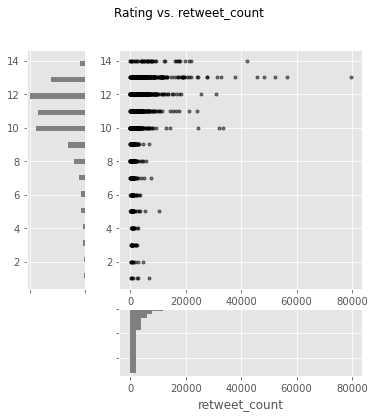

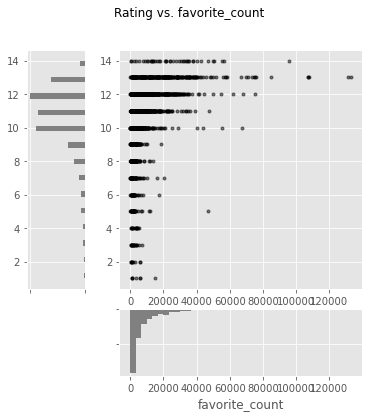

In [109]:
var_list_01 = ['retweet_count', 'favorite_count']

for i in var_list_01:
# Set up the axes with gridspec
    fig = plt.figure(figsize=(6, 6))
    grid = plt.GridSpec(4, 4, hspace=0.3, wspace=0.6)
    main_ax = fig.add_subplot(grid[:-1, 1:])
    y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
    x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
    fig.suptitle('Rating vs. %s' %i)
    
# Scatter plot on the main axes
    x = master_df[i]
    y = master_df.rating_numerator
    main_ax.plot(x, y, 'ok', markersize=3, alpha=0.5)
    plt.xlabel('%s'.replace('_', ' ') %i)
        
# Histograms on the attached axes
    x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
    x_hist.invert_yaxis()
        
    y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
    y_hist.invert_xaxis()
    
    


In [110]:
# plt.savefig('saved_figure.png')
# plt.savefig('point_histo_01.png')

#### Influence of dog breed (chunked) on ratings (bar chart)

In [111]:
# reset index to use breed_groups as variable
rating_x_breed_groups = groupby_breedgroups_df.reset_index(level=0)

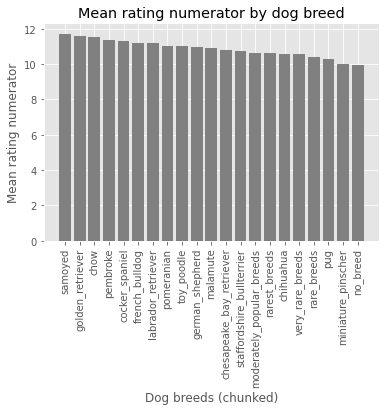

In [112]:
x = rating_x_breed_groups.breeds_grouped.tolist()
y = rating_x_breed_groups.rating_numerator.tolist()

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='gray')
plt.xlabel("Dog breeds (chunked)")
plt.ylabel("Mean rating numerator")
plt.title("Mean rating numerator by dog breed")
plt.xticks(x_pos, x, rotation=90)
plt.savefig('rating_breeds_bar.png', bbox_inches='tight')
plt.show();

#### Influence of dog stage on ratings (bar chart)

In [113]:
rating_x_dog_stage = groupby_dogstage_df.reset_index(level=0)

In [114]:
# https://moonbooks.org/Articles/How-to-extract-html-color-codes-hex-codes-from-a-seaborn-palette-/

# extract grey color codes from seaborn:
pal = sns.color_palette("Greys")
print(pal.as_hex())

['#ededed', '#d1d1d1', '#adadad', '#828282', '#5c5c5c', '#2b2b2b']


C:\Users\Cvetana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


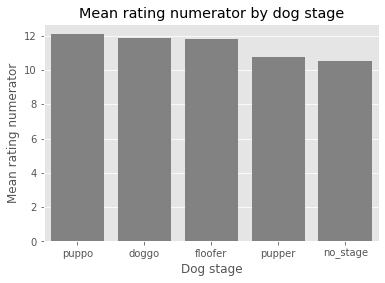

In [115]:
x = rating_x_dog_stage.dog_stage
y = rating_x_dog_stage.rating_numerator

sns.barplot(x, y, color='#828282')
plt.xlabel("Dog stage")
plt.ylabel("Mean rating numerator")
plt.title("Mean rating numerator by dog stage")
plt.savefig('rating_stages_01.png', bbox_inches='tight')
plt.show();

#### Top 5 rated dog breeds (chunked) per dog stage

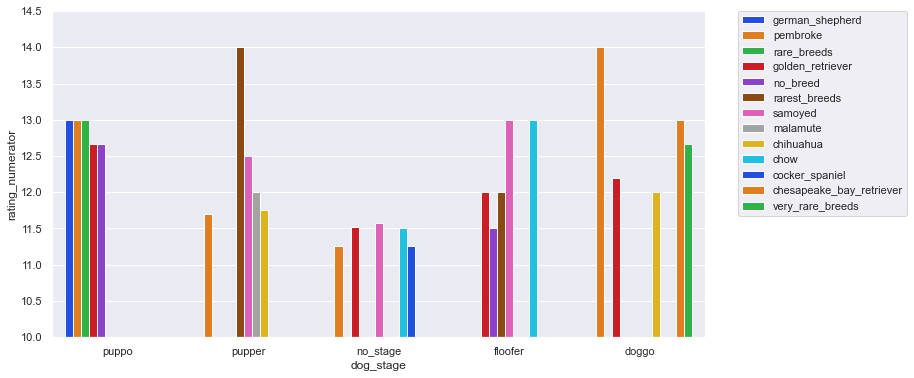

In [116]:
# https://www.statology.org/seaborn-grouped-bar-plot/
# https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot
# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
sns.set(rc={'figure.figsize':(11.7,6)})
sns.barplot(x='dog_stage', y='rating_numerator', hue='breeds_grouped', data=top5_breedgr_x_stage_df, palette = "bright") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(10, 14.5);

#### Top 5 rated dog breeds (NOT chunked) per dog stage

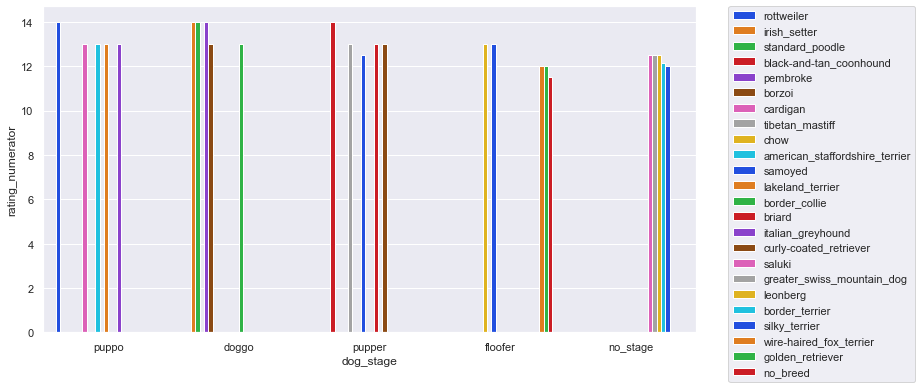

In [117]:
sns.set(rc={'figure.figsize':(11.7,6)})
sns.barplot(data = top5_breedxstage_df, x='dog_stage', y='rating_numerator', hue='dog_breed', palette = "bright") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);